Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0099 - val_loss: 7.8380e-05
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.6394e-04 - val_loss: 4.4135e-05
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.3973e-04 - val_loss: 4.1966e-05
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.9707e-04 - val_loss: 5.0197e-05
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9369e-04 - val_loss: 3.3730e-05
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8484e-04 - val_loss: 5.0661e-05
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.7752e-04 - val_loss: 5.4725e-05
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8517e-04 - val_loss: 3.0896e-05
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.5970e-04 - val_loss: 2.9783e-05
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.5392e-04 - val_loss: 2.9020e-05
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


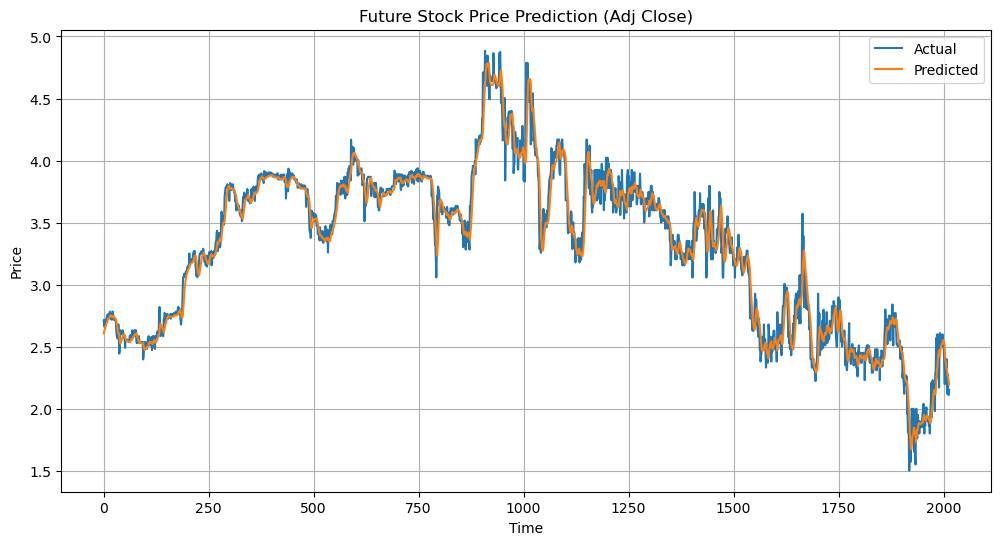

In [4]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 2. 데이터 불러오기
df = pd.read_csv("AAME.csv")  # ← 네 로컬 경로로 수정 가능
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# 3. 'Adj Close'만 사용
data = df[['Adj Close']].values

# 4. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 5. 시퀀스 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 6. 훈련/테스트 분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 7. LSTM 모델 정의
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 8. 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 9. 예측
predicted = model.predict(X_test)
predicted_actual = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

# 10. 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual")
plt.plot(predicted_actual, label="Predicted")
plt.title("Future Stock Price Prediction (Adj Close)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
